<a href="https://colab.research.google.com/github/MonuDS/DeepLearning/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

Using TensorFlow backend.


In [2]:
#Import data

batch_size = 128
num_classes = 10   # 0 to 9
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


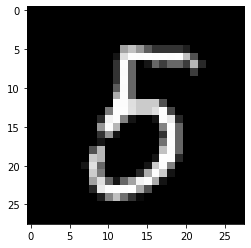

In [3]:
#Visualize Data

print("Label:",y_test[45:46])
plt.imshow(x_test[45:46].reshape(28,28), cmap='gray')
plt.show()

In [4]:
#Design a model

first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


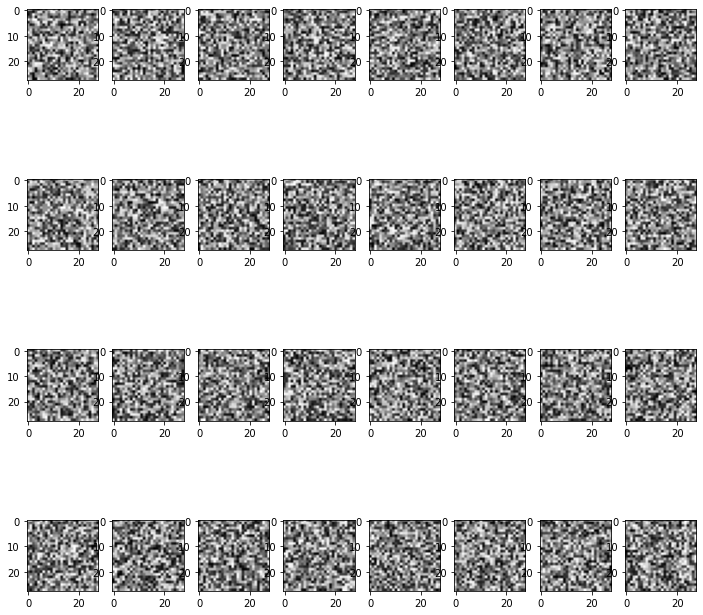

In [0]:
#Weights before Training

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [0]:
#Compiling a Model

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [6]:
#Training

# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
60000/60000 [==============================] - 1s 25us/step - loss: 1.2093 - accuracy: 0.6320
Epoch 2/2
60000/60000 [==============================] - 1s 20us/step - loss: 0.4181 - accuracy: 0.8837


In [7]:
#Testing

# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3337980530977249
Test accuracy: 0.9053000211715698


Shape of First Layer (784, 32)
Visualization of First Layer


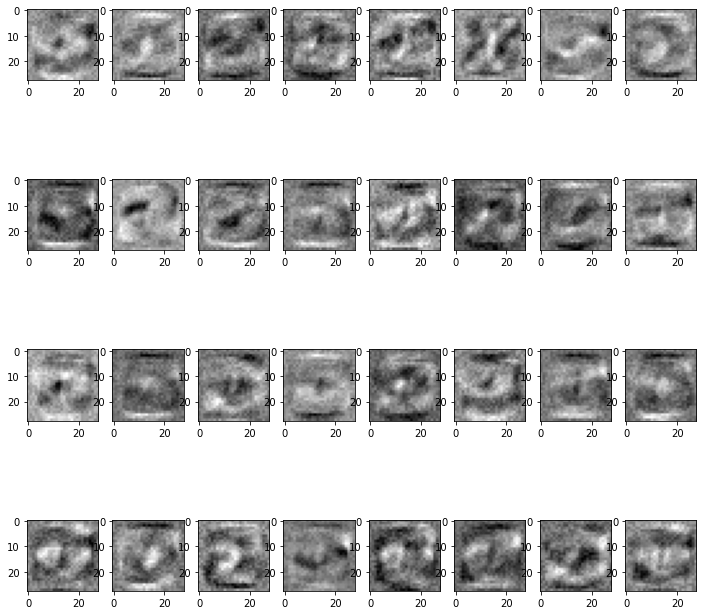

In [8]:
#Weights after Training

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [9]:
#Prediction

# Write the index of the test sample to test
prediction = model.predict(x_test[12:13])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [9.1643997e-05 1.6788010e-05 3.8170707e-05 2.1634091e-04 5.5171695e-02
 2.9691835e-03 1.2249091e-05 3.9393693e-02 1.7544006e-03 9.0033585e-01]

Thresholded output
 [0 0 0 0 0 0 0 0 0 1]


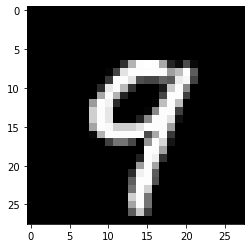

In [10]:
#Ground truth

# Write the index of the test sample to show
plt.imshow(x_test[12:13].reshape(28,28),cmap='gray')
plt.show()

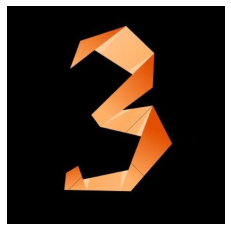

In [11]:
#User Input

# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

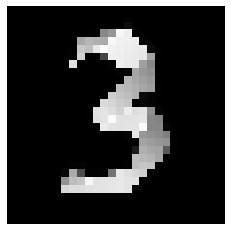

In [12]:
#Convert to grayscale and resize

# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [13]:
#Prediction

prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [8.56563292e-06 9.75371338e-04 1.72599324e-03 9.90964651e-01
 1.02282726e-07 2.69155111e-03 6.13843554e-08 1.71973906e-03
 1.82476372e-03 8.90451774e-05]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [14]:
#Saving a model

# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
#Loading a model

# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [16]:
#Retraining a model

loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
60000/60000 [==============================] - 1s 23us/step - loss: 0.3004 - accuracy: 0.9165
Epoch 2/2
60000/60000 [==============================] - 1s 21us/step - loss: 0.2475 - accuracy: 0.9306
Test loss: 0.23701338047981263
Test accuracy: 0.9345999956130981
